# 주성분분석 (패키지 없이)

* 패키지 없이 주성분분석을 구현
* 원리를 익히는데 중점을 맞춘다.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot

## 데이터 생성

In [38]:
# 데이터 생성
D = np.diag([1, 2, 0.4])
data = [1, 0.6, 0.1, 0.6, 1, 0.2, 0.1, 0.2, 1]
rr = np.array(data).reshape(3, 3)
Sigma = np.sqrt(D) @ rr @ np.sqrt(D)
mu = np.zeros(3)
n = 100
d1 = np.random.multivariate_normal(mu, Sigma, n)
d2 = (d1 - np.mean(d1, axis=0)) / np.std(d1, axis=0)

In [39]:
# 자료 확인
print("Covariance of d1:", np.cov(d1, rowvar=False))
print("Correlation of d1:", np.corrcoef(d1, rowvar=False))
print("Covariance of d2 (scaled data):", np.cov(d2, rowvar=False))

Covariance of d1: [[1.13634928 0.90383057 0.01353599]
 [0.90383057 1.7554496  0.18397841]
 [0.01353599 0.18397841 0.34146771]]
Correlation of d1: [[1.         0.63993656 0.02172998]
 [0.63993656 1.         0.23762813]
 [0.02172998 0.23762813 1.        ]]
Covariance of d2 (scaled data): [[1.01010101 0.64640057 0.02194947]
 [0.64640057 1.01010101 0.24002841]
 [0.02194947 0.24002841 1.01010101]]


## 고유값과 고유벡터

In [40]:
# 주성분 분석
eeR = np.linalg.eig(np.cov(d2.T))
U = eeR[1]   # 고유벡터
L = np.diag(eeR[0])  # 고유값의 모임

In [41]:
# 성분의 분산 및 누적 점수 계산
var_explained = eeR[0] / np.sum(eeR[0]) * 100
cum_var_explained = np.cumsum(var_explained)
print("Variance explained:", var_explained)
print("Cumulative variance explained:", cum_var_explained)

Variance explained: [56.33180579 10.80733416 32.86086006]
Cumulative variance explained: [ 56.33180579  67.13913994 100.        ]


In [42]:
# 원래의 공분산행렬과 비교
print("Original vs reconstructed covariance matrix:", U @ L @ U.T)
print("Eigen decomposition check (should be identity):", np.round(U @ U.T, 2))

Original vs reconstructed covariance matrix: [[1.01010101 0.64640057 0.02194947]
 [0.64640057 1.01010101 0.24002841]
 [0.02194947 0.24002841 1.01010101]]
Eigen decomposition check (should be identity): [[ 1. -0. -0.]
 [-0.  1.  0.]
 [-0.  0.  1.]]


## 주성분점수

In [43]:
# 주성분 점수 계산
Y = pd.DataFrame(d2)
p1 = Y @ U[:, 0]
p2 = Y @ U[:, 1]

## 시각화

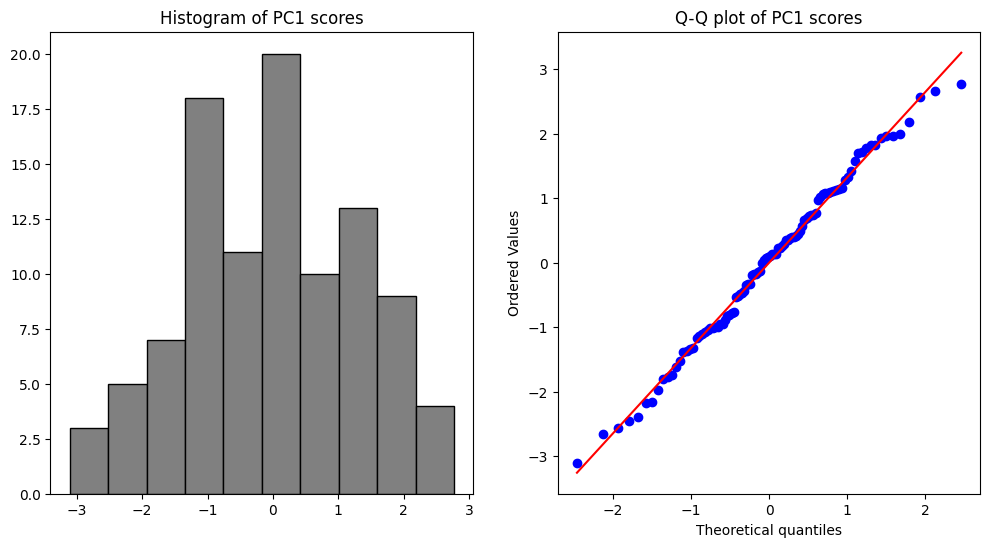

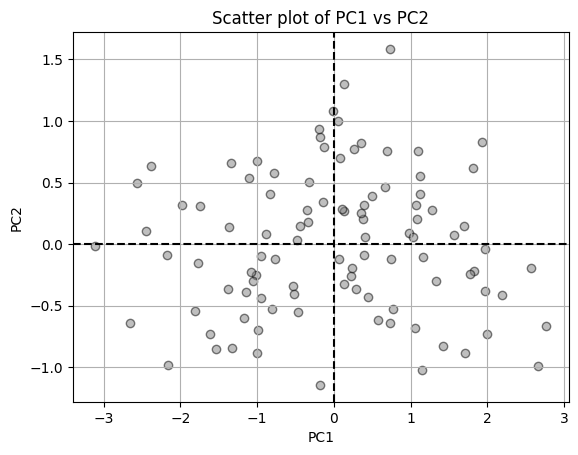

In [44]:
# 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(p1, bins=10, color='gray', edgecolor='black')
plt.title('Histogram of PC1 scores')

plt.subplot(1, 2, 2)
probplot(p1, dist="norm", plot=plt)
plt.title('Q-Q plot of PC1 scores')

# p1과 p2의 시각화
plt.figure()
plt.scatter(p1, p2, c='gray', edgecolor='black', alpha=0.5)
plt.axhline(0, color='black', linestyle='dashed')
plt.axvline(0, color='black', linestyle='dashed')
plt.title('Scatter plot of PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()